<font size="6"> Overview </font>

The titanic survival classification problem is a classic data science exercise. The objective is to predict survivorship for a cohort of passengers on the ship based on passenger data such as age, sex, and family size. 
Further details along with the datasets used here can be found on Kaggle here: https://www.kaggle.com/competitions/titanic/overview


In [213]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [214]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

Exploratory Data Analyis

In [215]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [216]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [217]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


The training set contains 891 rows, with another 418 in the test set. There are few null values - mainly in Age and Cabin. We will also need to encode the categorical features for our model.

In [218]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [219]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Data Visualization

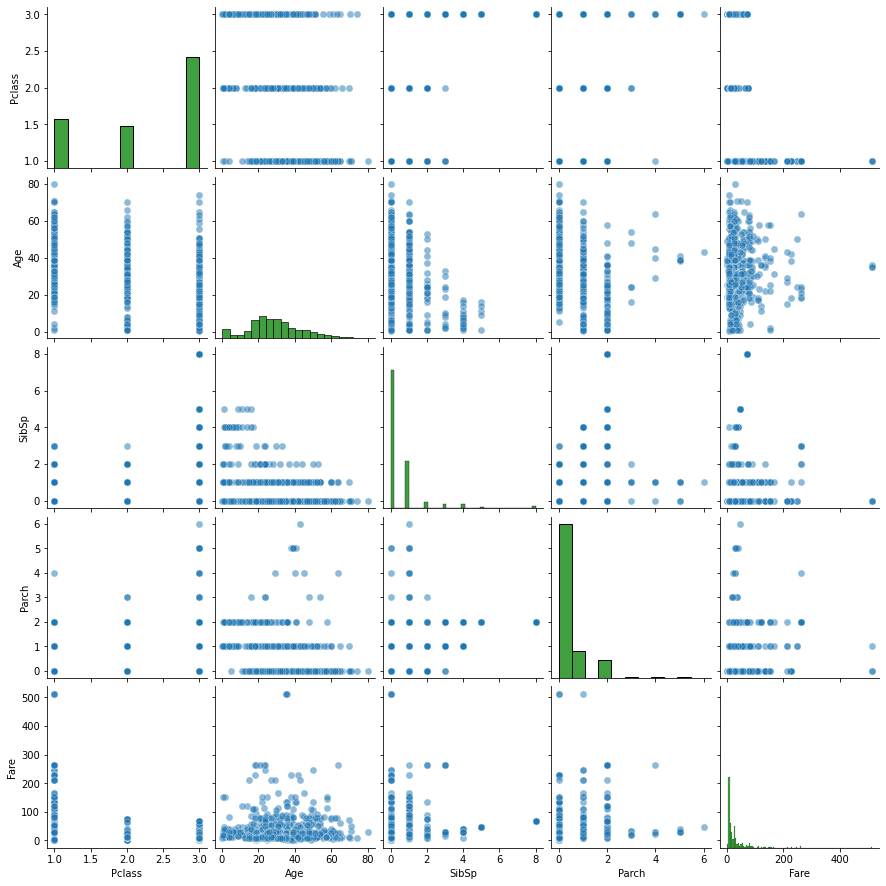

In [220]:
# Select numeric columns for scatterplots to visualize their distribution and correlations

columns = ['Pclass',  'Age', 'SibSp', 'Parch', 'Fare']
sns.pairplot(train[columns], markers='o', plot_kws={'alpha': 0.5, 's': 50}, diag_kind='hist', diag_kws={'color': 'green'})
plt.show()

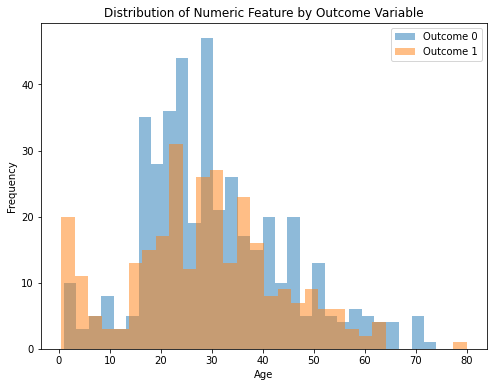

In [221]:
#Visualize age versus survival
plt.figure(figsize=(8, 6))
plt.hist(train[train['Survived'] == 0]['Age'], bins=30, alpha=0.5, label='Outcome 0')
plt.hist(train[train['Survived'] == 1]['Age'], bins=30, alpha=0.5, label='Outcome 1')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Numeric Feature by Outcome Variable')
plt.show()

<AxesSubplot:xlabel='Pclass'>

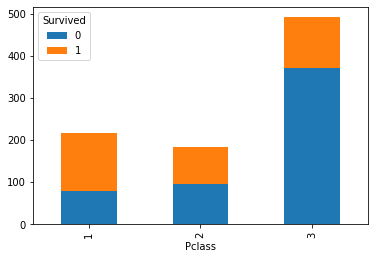

In [222]:
#Create stacked bar plots for categorical features
train.pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Sex'>

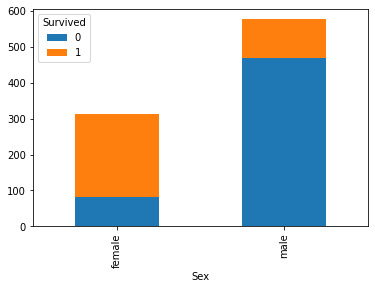

In [223]:
train.pivot_table('PassengerId', 'Sex', 'Survived', 'count').plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Embarked'>

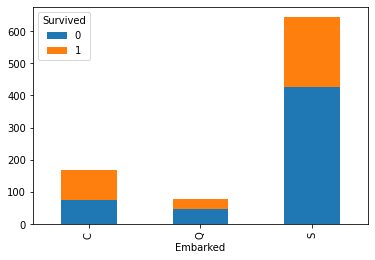

In [224]:
train.pivot_table('PassengerId', 'Embarked', 'Survived', 'count').plot(kind='bar', stacked=True)

Feature Extraction

Sex: Use one-hot encoding to get a binary variable for Female. We will still want to impute values for null values
Embarked: Use one-hot encoding to create binary variables for C and Q
Cabin: Split into numeric and alphabetic portions
Ticket num: Take only the numeric portion of the ticket number

In [225]:
#Regular Expression functions to extract from Cabin and Ticket

def extract_abc(x):
    if x == 'nan':
        return None
    else:
        letters = re.search(r'[A-Za-z]+', str(x))
        return str(letters.group()) if letters else None

def extract_num(x):
    if x == 'nan':
        return None
    else:
        numbers = re.search(r'\d+', str(x))
        return str(numbers.group()) if numbers else None
    
def extract_ticket_num(x):
    if x == 'nan':
        return None
    else:
        numbers = re.search(r'\d+$', str(x))
        return str(numbers.group()) if numbers else None

In [226]:
train['cabin_abc'] = train['Cabin'].apply(lambda x: extract_abc(x))
train['cabin_num'] = train['Cabin'].apply(lambda x: extract_num(x))
train['ticket_num'] = train['Ticket'].apply(lambda x: extract_ticket_num(x))

test['cabin_abc'] = test['Cabin'].apply(lambda x: extract_abc(x))
test['cabin_num'] = test['Cabin'].apply(lambda x: extract_num(x))
test['ticket_num'] = test['Ticket'].apply(lambda x: extract_ticket_num(x))

train['cabin_num'] = pd.to_numeric(train['cabin_num'], errors='coerce')
train['ticket_num'] = pd.to_numeric(train['ticket_num'], errors='coerce')

test['cabin_num'] = pd.to_numeric(train['cabin_num'], errors='coerce')
test['ticket_num'] = pd.to_numeric(train['ticket_num'], errors='coerce')

In [227]:
#Impute Values for NaNs based on the mean value. We can be more precise here by using more information to impute these values, but this can lead to overfitting
average_age = train['Age'].mean()
average_cabin = train['cabin_num'].mean()
average_ticket = train['ticket_num'].mean()


train['Age'].fillna(average_age, inplace=True)
train['cabin_num'].fillna(average_cabin, inplace=True)
train['cabin_abc'].fillna('U', inplace=True)
train['ticket_num'].fillna(average_ticket, inplace=True)

#Test set additionally has 1 NaN value for Fate
average_age = test['Age'].mean()
average_cabin = test['cabin_num'].mean()
average_ticket = test['ticket_num'].mean()
average_fare = test['Fare'].mean()

test['Age'].fillna(average_age, inplace=True)
test['cabin_num'].fillna(average_cabin, inplace=True)
test['cabin_abc'].fillna('U', inplace=True)
test['ticket_num'].fillna(average_ticket, inplace=True)
test['Fare'].fillna(average_fare, inplace=True)



In [228]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_abc,cabin_num,ticket_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,nan,50.49,21171.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,85.00,17599.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,nan,50.49,3101282.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,123.00,113803.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,nan,50.49,373450.0


In [229]:
#Normalize ticket num to reduce large numerical values without altering the non-gaussian distribution of the data
scaler = MinMaxScaler()
data = train['ticket_num'].values.reshape(-1, 1)
scaler.fit(data)
train['ticket_num_normalized'] = scaler.transform(data)

test_data = test['ticket_num'].values.reshape(-1, 1)
scaler.fit(test_data)
test['ticket_num_normalized'] = scaler.transform(test_data)



Encode Categorical Variables

In [230]:
#Use one-hot encoding to create dummy columns for categorical features
for column in ['Sex','Embarked','cabin_abc']:
    if not pd.api.types.is_numeric_dtype(column):
        dummies = pd.get_dummies(train[column], drop_first=False)
        dummies = dummies.add_prefix('{}_'.format(column))
        train.drop(column, axis=1, inplace=True)
        train = train.join(dummies)
for column in ['Sex','Embarked','cabin_abc']:
    if not pd.api.types.is_numeric_dtype(column):
        dummies = pd.get_dummies(test[column], drop_first=False)
        dummies = dummies.add_prefix('{}_'.format(column))
        test.drop(column, axis=1, inplace=True)
        test = test.join(dummies)

In [231]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Embarked_S,cabin_abc_A,cabin_abc_B,cabin_abc_C,cabin_abc_D,cabin_abc_E,cabin_abc_F,cabin_abc_G,cabin_abc_T,cabin_abc_nan
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,...,1,0,0,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,0,0,0,1,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,1,0,0,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,...,1,0,0,1,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,...,1,0,0,0,0,0,0,0,0,1


In [232]:
#Drop columns not needed for model
for column in ['Name','Ticket','Cabin','ticket_num']:
    train.drop(column, axis=1, inplace=True)
for column in ['Name','Ticket','Cabin','ticket_num']:
    test.drop(column, axis=1, inplace=True)

In [237]:
#Drop cabin_abc_T from training set because it is not present in test set
print(train.columns.difference(test.columns))
train.drop('cabin_abc_T', axis=1, inplace=True)


Index(['Survived', 'cabin_abc_T'], dtype='object')


Create Classification Model Using Random Forest

In [240]:
X_train, X_test, y_train, y_test = train_test_split(train.loc[:, train.columns != 'Survived'], train['Survived'], test_size=0.25, random_state=0)

In [241]:
RF=RandomForestClassifier()
RF.fit(X_train, y_train)
param_grid = {
    'n_estimators': [50, 100, 200, 300],              
    'max_depth': [None, 5, 10, 25, 50],         
    'min_samples_split': [2, 5, 10],               
    'min_samples_leaf': [1, 2, 4],              
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']       
}

grid_search = GridSearchCV(RF, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)

train_score=best_rf_model.score(X_train, y_train)
test_score=best_rf_model.score(X_test, y_test)

print(f"Random Forest Training Accuracy: {train_score:.2f}%")
print(f"Random Forest Test Accuracy: {test_score:.2f}%")


Random Forest Training Accuracy: 0.93%
Random Forest Test Accuracy: 0.83%


In [242]:
#Print the best score and set of parameters from Grid Search
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8308382897542362
Best parameters: {'criterion': 'gini', 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


Make Final Predictions on Test Set

In [243]:
y_pred_Submission = best_rf_model.predict(test)

In [244]:
submission = pd.DataFrame({
        'PassengerId': test['PassengerId'],
        'Survived': y_pred_Submission
    })

The final submission output results in 78% prediction accuracy on the test set. While it is possible to get over 80% accuracy here, the goal was not to get a top score but instead primarily to explore the data and create a good model. Further improvements could be made by more precise hyperparameter tuning, as well as some further feature extraction from columns such as Name. 